In [27]:
# Import all relevent libraries to analyse the data
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt

# This line makes sure that our graphs are rendered within the notebook
%matplotlib inline

# Set options to display all columns
# pd.set_option("display.max_columns",None)

In [54]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from nltk.probability import FreqDist

# Load the data into a pandas dataframe
# Display the size of the dataset and first couple of rows to see what it looks like
data=pd.read_csv('Reviews.csv')

def get_word_counts(text):
    tokenized_word=tokenizer.tokenize(text)
    fdist = FreqDist(tokenized_word)
    return [fdist.B(), fdist.N()]

print(data.shape)
text_attributes = pd.DataFrame(data["Text"].map(get_word_counts), data.index)["Text"].apply(pd.Series)
text_attributes.columns = ["n_distinct_words", "n_words"]
data = pd.concat([data[:], text_attributes[:]], axis=1)
# data["n_distinct_words_and_n_words"] = data["Text"].map(get_word_counts)
data["Time"] = data["Time"].map(lambda timestamp: pd.Timestamp(timestamp, unit="s"))
data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,n_distinct_words,n_words
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,40,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,27,32
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,67,93
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,36,41
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,21,27


In [6]:
!pip install nltk

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rmartinez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmartinez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rmartinez\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rmartinez\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
data['Text'].size

568454

In [9]:
[col for col in data]

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [38]:
data.ProductId.value_counts()
data.ProductId.nunique() 

568454/74258


7.655121333728353

In [10]:
Text_test = data.loc[0,'Text']
print(Text_test)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [11]:
import string
Text_test.translate(dict.fromkeys(string.punctuation))

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [12]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(Text_test)

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most']

In [22]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# tokenized_word=word_tokenize(Text_test)
tokenized_word=tokenizer.tokenize(Text_test)
fdist = FreqDist(tokenized_word)
stop_words=set(stopwords.words("english")) # print(stop_words)

print(tokenized_word)
print(stop_words)
print(fdist.B())
print(fdist.N())

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most']
{'own', 'myself', 'because', 'very', "shan't", 'about', 'don', 'are', 'which', 'wasn', 'or', 'am', 'from', 'over', 'just', 've', 'their', 'all', "didn't", 'hers', 'then', "needn't", 'll', 'but', 're', "that'll", 'some', "isn't", "you're", 'yours', 'it', 't', 'haven', 'whom', 'after', 'isn', 'under', 'shouldn', 'yourself', 'have', 'who', 'those', 'being', 'into', "mustn't", 'them', "hasn't", 'down', 'y', 'does', 'hadn', 'ain', 'ourselves', 'not', 'himself', 'once', 'more', "don't", 'further', "wouldn't", "you'd", "you've", 'doesn', "aren't", "shouldn't", 'ma', 'other', 'only', "it's", 'of'

I:1
bought:1
several:1
Vitality:1
canned:1
dog:1
food:1
products:1
found:1
good:1
quality:1
The:1
product:2
looks:1
like:1
stew:1
processed:1
meat:1
smells:1
better:2
My:1
Labrador:1
finicky:1
appreciates:1


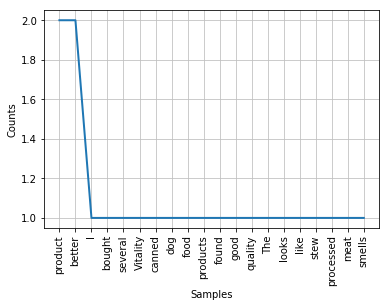

In [14]:
sr= stopwords.words('english')
clean_tokens = tokenized_word[:]
for token in tokenized_word:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)

for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

In [15]:
print(fdist.most_common(2))
print(list(filter(lambda t: t[1] > 1,freq.most_common(5))))

[('and', 3), ('have', 2)]
[('product', 2), ('better', 2)]


In [16]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most']
Filterd Sentence: ['I', 'bought', 'several', 'Vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'The', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'My', 'Labrador', 'finicky', 'appreciates', 'product', 'better']


In [17]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['I', 'bought', 'several', 'Vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'The', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'My', 'Labrador', 'finicky', 'appreciates', 'product', 'better']
Stemmed Sentence: ['I', 'bought', 'sever', 'vital', 'can', 'dog', 'food', 'product', 'found', 'good', 'qualiti', 'the', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'My', 'labrador', 'finicki', 'appreci', 'product', 'better']


In [18]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [19]:
tokens=nltk.word_tokenize(Text_test)
print(tokens)
nltk.pos_tag(tokens)

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', '.', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', '.', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', '.']


[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('Labrador', 'NNP'),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

In [49]:
!pip install spacy

In [51]:
import nltk.classify.util
from collections import Counter
from nltk import ngrams
import numpy as np
import pandas as pd
import re
import string
string.punctuation
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

#from stemming.porter2 import stem

#remove words that are in NLTK stopwords list
not_stopwords = {'no', 'don', 'not'}
new_stopwords = set([word for word in stopwords if word not in not_stopwords])

from nltk.stem.wordnet import WordNetLemmatizer

ps = nltk.PorterStemmer()
lm =  WordNetLemmatizer()
number='0123456789'

def no_space(sentence):
    sentence = [x.replace(' ', '') for x in sentence]

    return sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmartinez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
#initial clean removes punctuation and sets all text to lower case
def initial_clean(text):
   
    #remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub("(\')",'',str(text))
    text = re.sub(r"(\W)",r' ',str(text))
    text = re.sub(r" +",r' ',str(text))
    text = re.sub("\/"," ",str(text))
    text = re.sub(r'\b\d+(?:\.\d+)?\s+','',str(text))
    text = re.sub('^[0-9 ]+', '', str(text))
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ",str(text))
    nopunct = text.lower()
    nonumb= "".join([char for char in nopunct if char not in number])
   
    return nonumb

In [53]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nlp = spacy.load('en', disable = ['ner', 'textcat', 'similarity', 'merge_noun_chunks', 'merge_entities', 'tensorizer', 'parser', 'sbd', 'sentencizer'])


def lemmatize_sentences(nlp_spacy, text_series):
    lemmatized_sentences = []
    for text in text_series.astype(str):
        lemmas = []
        for token in nlp_spacy(text):
            lemmas.append(token.lemma_)
        lemmatized_sentences.append(' '.join(lemmas))
    return lemmatized_sentences

OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [50]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nlp = spacy.load('en', disable = ['ner', 'textcat', 'similarity', 'merge_noun_chunks', 'merge_entities', 'tensorizer', 'parser', 'sbd', 'sentencizer'])


def lemmatize_sentences(nlp_spacy, text_series):
    lemmatized_sentences = []
    for text in text_series.astype(str):
        lemmas = []
        for token in nlp_spacy(text):
            lemmas.append(token.lemma_)
        lemmatized_sentences.append(' '.join(lemmas))
    return lemmatized_sentences

#stems words, applies the spelling corrector and removes any stopwords
def clean_data_stem(text):
    #split review into words tokenized
    tokens = re.split('\W+',text) 
    #text = [ ps.stem(correction(word)) for word in tokens if word not in stopwords]
    text = [ word for word in tokens if word not in stopwords]
    return text

def data_for_ngram(text):
    new_text=""
    for word in text: #.split():
        if word not in stopwords:
            #new_text=new_text+" "+ps.stem(correction(word))
            #new_text=new_text+" "+ps.stem(word)
            new_text=new_text+" "+word
            
    return new_text

def ngram_count(words, text):
     
    count = 0
    for word in text:  
        if word == words:
            count +=1 
    return count


def ngram_list(text):

    list_ngram=[]
    bigrams=ngrams(text.split(),2)
    for gram in bigrams:
        newgram=""
        for word in gram:
            newgram=newgram+word+" "
        list_ngram.append(newgram[0:len(newgram)-1])
    #trigrams=ngrams(text.split(),3)
    #for gram in trigrams:
    #    newgram=""
    #    for word in gram:
    #        newgram=newgram+word+" "
    #    list_ngram.append(newgram[0:len(newgram)-1])

    return list_ngram



def feature_selection(data):

    #does the initial clean ready to find any double bonded words
    data['Initial Clean']=data['text'].apply(lambda x: initial_clean(x))
    data['Stem']=data['Initial Clean'].apply(lambda x: clean_data_stem(x))
    data['ngram']=data['Initial Clean'].apply(lambda x: data_for_ngram(x))
    data['grams']=data['ngram'].apply(lambda x: ngram_list(x))
    
    return data


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmartinez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


OSError: [E050] Can't find model 'en'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [39]:
data.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,n_distinct_words,n_words
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,28,29
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,42,49
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",57,67
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,32,35
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,...",19,21
